### PCA

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import plotly.plotly as py
import plotly.graph_objs as go
import plotly.tools as tls
from sklearn.decomposition import PCA
from scipy.stats import norm
from matplotlib.backends.backend_pdf import PdfPages
from scipy.cluster.hierarchy import dendrogram, linkage

In [2]:
sns.set(font="monospace")
sns.set(font_scale=1.8)
#sns.set_palette("YlGnBu")

### Data

In [3]:
data = pd.read_csv('../datareader/score/score.csv')
data = data.set_index('Protein')
ndf = data.copy(deep =True)

In [4]:
ndf.head(2)

,ARR,CHD,CM,CVA,IHD,VD
Protein,,,,,,
alpha-1-antitrypsin,0.009000,0.120724,0.036423,0.047402,0.103137,0.023655
mothers_against_decapentaplegic_homolog_4,0.005316,0.080604,0.056011,0.010512,0.039842,0.000000


In [5]:
ndf.shape

(2702, 6)

----------------

In [6]:
tdata = ndf.copy(deep =True)

In [7]:
clrs = []
for row,col in tdata.T.iteritems():
    val = np.array(col)
    mx = max(val)
    for item in val:
        if  mx == col[0]:
            grp =  'mediumslateblue'
        elif mx == col[1]:
            grp =  'deepskyblue'
        elif mx == col[2]:
            grp = 'firebrick'
        elif mx == col[3]:
            grp = 'navy'
        elif mx == col[4]:
            grp = 'green'
        elif mx == col[5]:
            grp = 'darkgoldenrod'
    clrs.append(grp)

## PCA 3D: CVD 

In [19]:
def pca3d(data):
    names = ['ARR', 'CHD', 'CM','CVA', 'IHD', 'VD']
    transposeDf = data.T
    pca = PCA(n_components=3)
    new_data = pca.fit_transform(transposeDf)
   
    matrix = np.array(new_data)
    matrix = matrix.T
   
    x = matrix[0]
    y = matrix[1]
    z = matrix[2]
    
    print('new_data is:',new_data)
    print('explained variance ratio:', pca.explained_variance_ratio_)
    print('sum  of explained variance ratio',sum(pca.explained_variance_ratio_))
    
    return x,y,z

In [20]:
cvddata = ndf.copy(deep =True)

new_data is: [[-0.74500124 -0.20998779 -0.19123371]
 [-1.15512554 -0.30951307 -0.87904015]
 [ 0.30871937 -1.01243368  1.50483283]
 [ 0.09210838  2.03113607  0.48246201]
 [ 2.42915645 -0.2538485  -0.75009505]
 [-0.92985742 -0.24535302 -0.16692593]]
explained variance ratio: [0.38200319 0.23617699 0.16997035]
sum  of explained variance ratio 0.7881505271207021


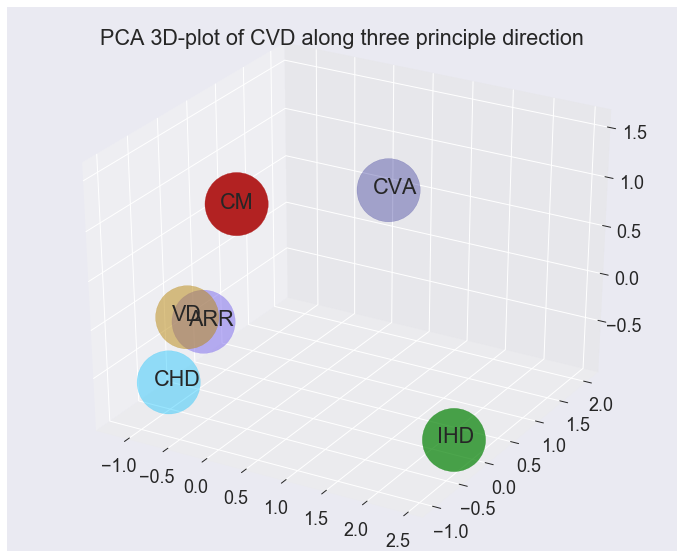

In [28]:
import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import matplotlib.pyplot as plt

names = ['ARR', 'CHD', 'CM','CVA', 'IHD', 'VD']
mycolor   =['mediumslateblue', 'deepskyblue','firebrick','navy','green','darkgoldenrod']
mpl.rcParams['legend.fontsize'] = 100

fig = plt.figure(figsize = [12,10])
ax = fig.gca(projection='3d')
plt.title('PCA 3D-plot of CVD along three principle direction')

x,y,z = pca3d(cvddata)

ax.scatter(x, y, z, label='pca', s=4000, color=mycolor)

for i, txt in enumerate(names):
    ax.text(x[i]-0.2,y[i],z[i]-0.08,names[i])
plt.savefig('pca-cvd-3d.png')